In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime
#import plotly.graph_objects as go

In [2]:
#crate paths for csv files
CURR_DIR = os.getcwd()
print(CURR_DIR)
zlecenia_path = os.path.join(CURR_DIR, 'Zlecenia.csv')
godziny_path = os.path.join(CURR_DIR, 'Godziny.csv')

C:\Users\ksobo\Desktop\DS_final_project


In [3]:
#Zaciagniecie baz danych
zlecenia_df = pd.read_csv(zlecenia_path, sep=';')
godziny_df = pd.read_csv(godziny_path, sep=';')

In [4]:
#Ekstrakcja danych i organizacja danych - pozostawienie tylko kolumn wymaganych, pozostawienie tylko projektów zakończonych
zlecenia_df1 = zlecenia_df.drop(columns=['work_preparation_Plan','work_preparation_done', 'Finnish_week', 'Pre_fabrication_plan'], axis=1)
zlecenia_df2 = zlecenia_df1.loc[-zlecenia_df1['Active'].isin(['Active'])]
godziny_df = godziny_df[['No','Wszystkie.wykonane']]
zlecenia_df2

,No,Description,Weight_for_1,Quantity,Typ,Active
0,1,2320,3360,1,B,0
1,2,2320,3360,1,B,0
2,3,3230,6400,1,B,0
3,4,2830,6230,2,C,0
4,5,2625,5000,2,C,0
...,...,...,...,...,...,...
1229,1230,1412,970,2,B,0
1230,1231,1412,970,2,B,0
1231,1232,1412,970,2,B,0
1232,1233,1412,970,2,B,0


In [5]:
#Left join po No z godzinami
zlecenia_df2 = pd.merge(zlecenia_df2, godziny_df, how='left', on='No')

In [6]:
#Wyliczenie realnych równoważników zleceń
zlecenia_df2['Labor rate'] = zlecenia_df2['Wszystkie.wykonane'] / (zlecenia_df2['Weight_for_1'] * zlecenia_df2['Quantity']) 

In [7]:
typ_A = zlecenia_df2.loc[zlecenia_df2['Typ'].isin(['A'])].sort_values(by=['Labor rate'])
typ_B = zlecenia_df2.loc[zlecenia_df2['Typ'].isin(['B'])].sort_values(by=['Labor rate'])
typ_C = zlecenia_df2.loc[zlecenia_df2['Typ'].isin(['C'])].sort_values(by=['Labor rate'])

<AxesSubplot:xlabel='Weight_for_1', ylabel='Labor rate'>

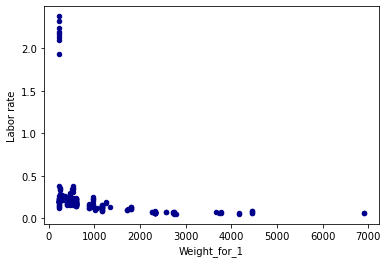

In [8]:
#Typ_A
typ_A_plot = typ_A.plot.scatter(x='Weight_for_1',
                      y='Labor rate',
                      c='DarkBlue')

typ_A_plot

<AxesSubplot:xlabel='Weight_for_1', ylabel='Labor rate'>

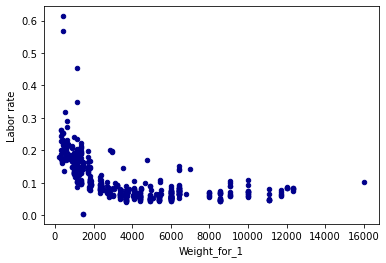

In [9]:
typ_B_plot = typ_B.plot.scatter(x='Weight_for_1',
                      y='Labor rate',
                      c='DarkBlue')

typ_B_plot

<AxesSubplot:xlabel='Weight_for_1', ylabel='Labor rate'>

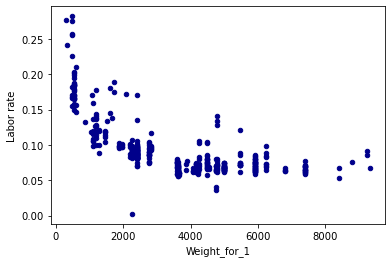

In [10]:
typ_C_plot = typ_C.plot.scatter(x='Weight_for_1',
                      y='Labor rate',
                      c='DarkBlue')

typ_C_plot

In [11]:
#Pogrupowanie po Typie i wyciągnięcie średniej - tak dla szybkiego zerknięcia czy ma to sens
zlecenia_mean = zlecenia_df2.groupby(['Typ']).mean()

print(zlecenia_mean)

             No  Description  Weight_for_1  Quantity  Wszystkie.wykonane  \
Typ                                                                        
A    675.484536  1326.376289   1116.469072  2.422680          333.615979   
B    620.742321  2260.571672   3659.675768  1.571672          439.688567   
C    560.081585  2193.731935   3562.121212  1.951049          548.962704   

     Labor rate  
Typ              
A      0.251804  
B      0.110871  
C      0.092586  


In [12]:
#Zlecenia które nie zostały opracowane wypełnione zostaną wartościami przewidzianymi w prekalkulacji

#A - dziób(wędka)
    #Labor rate	130 rbg/1000kg
#Assembling	0,4
#Welding	0,33
#Grindining	0,07
#Else		0,2

#B - belka(środek)
#Labor rate	100 rbg/1000kg
#Assembling	0,3
#Welding	0,4
#Grindining	0,2
#Else		0,1

#C - gniazdo(końcówka)
#Labor rate	120 rbg/1000kg
#Assembling	0,25
#Welding	0,4
#Grindining	0,2
#Else		0,15

In [ ]:
#Jak zorbić buckety na 500kg i z tego średnie na etapach